<a href="https://colab.research.google.com/github/Tkaheva/MO/blob/main/homework_practice_5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Многоклассовая классификация.

Посмотрим на примере алгоритма логистической регрессии и метода опорных векторов, как работать с различными методами многоклассовой классификации.

### 1.
Вспомните датасет Wine. Загрузите его, разделите на тренировочную и тестовую выборки (random_state=17), используя только [9, 11, 12] признаки.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Загрузка датасета
wine = load_wine()
X = wine.data
y = wine.target

# Выбор только [9, 11, 12] признаков (индексация с 0)
feature_indices = [8, 10, 11]  # 9, 11, 12 признаки (индексы 8, 10, 11)
X_selected = X[:, feature_indices]

print("Информация о выбранных признаках:")
print(f"Всего признаков в датасете: {X.shape[1]}")
print(f"Выбраны признаки: {feature_indices}")
print(f"Названия выбранных признаков: {[wine.feature_names[i] for i in feature_indices]}")
print(f"Форма X_selected: {X_selected.shape}")
print(f"Классы: {np.unique(y)}")

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=17, stratify=y
)

print(f"\nРазмеры выборок:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# Задание типа кросс-валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)


Информация о выбранных признаках:
Всего признаков в датасете: 13
Выбраны признаки: [8, 10, 11]
Названия выбранных признаков: ['proanthocyanins', 'hue', 'od280/od315_of_diluted_wines']
Форма X_selected: (178, 3)
Классы: [0 1 2]

Размеры выборок:
X_train: (124, 3), X_test: (54, 3)
y_train: (124,), y_test: (54,)


**Задайте тип кросс-валидации с помощью StratifiedKFold: 5-кратная, random_state=17.**

In [3]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [5]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)




### 2.
Обучите логистическую регрессию (LogisticRegression) с параметром C по умолчанию и random_state=17. Укажите гиперпараметр multi_class='ovr' - по умолчанию многие классификаторы используют именно его. С помощью cross_val_score сделайте кросс-валидацию (используйте объект skf) и выведите среднюю долю правильных ответов на ней (используйте функцию mean). Отдельно выведите долю правильных ответов на тестовой выборке.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
print("\n" + "="*60)
print("2. Логистическая регрессия (LogisticRegression)")
print("="*60)

logreg = LogisticRegression(random_state=17, multi_class='ovr', max_iter=1000)
logreg.fit(X_train, y_train)

# Кросс-валидация
cv_scores_logreg = cross_val_score(logreg, X_selected, y, cv=skf)
print(f"Результаты кросс-валидации (5-fold): {cv_scores_logreg}")
print(f"Средняя точность на кросс-валидации: {cv_scores_logreg.mean():.4f}")
print(f"Стандартное отклонение: {cv_scores_logreg.std():.4f}")

# Предсказание на тестовой выборке
y_pred_logreg = logreg.predict(X_test)
test_accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Точность на тестовой выборке: {test_accuracy_logreg:.4f}")

print(f"\nКоэффициенты модели (для каждого класса по отдельности в методе OVR):")
for i, coef in enumerate(logreg.coef_):
    print(f"Класс {i} vs остальные: {coef}")

print(f"Константы (intercept): {logreg.intercept_}")



2. Логистическая регрессия (LogisticRegression)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Результаты кросс-валидации (5-fold): [0.69444444 0.69444444 0.75       0.65714286 0.6       ]
Средняя точность на кросс-валидации: 0.6792
Стандартное отклонение: 0.0495
Точность на тестовой выборке: 0.6481

Коэффициенты модели (для каждого класса по отдельности в методе OVR):
Класс 0 vs остальные: [0.88406991 0.62036462 1.79045563]
Класс 1 vs остальные: [-0.44450606  1.66743802  0.42859918]
Класс 2 vs остальные: [-0.56940151 -2.19760575 -2.88912324]
Константы (intercept): [-7.78228365 -2.43593132  8.34856264]


### 3.
Обучите метод опорных векторов (SVC) с random_state=17 и остальными параметрами по умолчанию. Этот метод при мультиклассовой классификации также использует метод "ovr". Сделайте кросс-валидацию (используйте skf) и, как и в предыдущем пункте, выведите среднюю долю правильных ответов на ней. Отдельно выведите долю правильных ответов на тестовой выборке.

In [8]:
from sklearn.svm import SVC

In [9]:
print("\n" + "="*60)
print("3. Метод опорных векторов (SVC)")
print("="*60)

svc = SVC(random_state=17, probability=True)  # probability=True для получения вероятностей
svc.fit(X_train, y_train)

# Кросс-валидация
cv_scores_svc = cross_val_score(svc, X_selected, y, cv=skf)
print(f"Результаты кросс-валидации (5-fold): {cv_scores_svc}")
print(f"Средняя точность на кросс-валидации: {cv_scores_svc.mean():.4f}")
print(f"Стандартное отклонение: {cv_scores_svc.std():.4f}")

# Предсказание на тестовой выборке
y_pred_svc = svc.predict(X_test)
test_accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Точность на тестовой выборке: {test_accuracy_svc:.4f}")

# Сравнение моделей
print("\n" + "="*60)
print("Сравнение моделей")
print("="*60)
print(f"Логистическая регрессия - тестовая точность: {test_accuracy_logreg:.4f}")
print(f"SVC - тестовая точность: {test_accuracy_svc:.4f}")
print(f"Разница: {abs(test_accuracy_logreg - test_accuracy_svc):.4f}")



3. Метод опорных векторов (SVC)
Результаты кросс-валидации (5-fold): [0.66666667 0.66666667 0.75       0.68571429 0.62857143]
Средняя точность на кросс-валидации: 0.6795
Стандартное отклонение: 0.0398
Точность на тестовой выборке: 0.6852

Сравнение моделей
Логистическая регрессия - тестовая точность: 0.6481
SVC - тестовая точность: 0.6852
Разница: 0.0370


Как видно из полученной метрики, на тестовой выборке метод с гиперпараметрами по умолчанию работает явно намного хуже логистической регрессии. В целом, SVM достаточно плохо масштабируется на размер обучающего набора данных (как видно, даже с тремя признаками он работает не очень хорошо), но благодаря возможности выбора различных ядер (функций близости, которые помогают разделять данные) и другим гиперпараметрам SVM можно достаточно точно настроить под определенный вид данных. Подробнее на этом останавливаться в контексте данного урока не будем.

### 4.
Для предсказаний обеих моделей постройте матрицу ошибок (confusion matrix) и напишите, какие классы каждая из моделей путает больше всего между собой.

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
print("\n" + "="*60)
print("4. Матрицы ошибок")
print("="*60)

# Матрица ошибок для логистической регрессии
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Матрица ошибок для логистической регрессии:")
print(cm_logreg)

# Матрица ошибок для SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("\nМатрица ошибок для SVC:")
print(cm_svc)

# Анализ, какие классы путаются больше всего
print("\nАнализ путаницы классов:")
print("-" * 40)

for model_name, cm, y_pred in [("Logistic Regression", cm_logreg, y_pred_logreg),
                               ("SVC", cm_svc, y_pred_svc)]:
    print(f"\n{model_name}:")

    # Находим пары классов с наибольшим количеством ошибок
    max_errors = 0
    worst_pair = (0, 0)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i != j and cm[i, j] > max_errors:
                max_errors = cm[i, j]
                worst_pair = (i, j)

    if max_errors > 0:
        print(f"  Больше всего путаницы между классами {worst_pair[0]} и {worst_pair[1]}")
        print(f"  Количество ошибок: {max_errors}")

        # Находим конкретные образцы, которые были неправильно классифицированы
        misclassified_indices = []
        for idx, (true_label, pred_label) in enumerate(zip(y_test, y_pred)):
            if true_label == worst_pair[0] and pred_label == worst_pair[1]:
                misclassified_indices.append(idx)

        if misclassified_indices:
            print(f"  Примеры неправильно классифицированных образцов (первые 3):")
            for i, idx in enumerate(misclassified_indices[:3]):
                print(f"    Образец {idx}: истинный класс {worst_pair[0]}, предсказанный {worst_pair[1]}")
                print(f"      Признаки: {X_test[idx]}")
    else:
        print("  Нет ошибок классификации между разными классами")



4. Матрицы ошибок
Матрица ошибок для логистической регрессии:
[[12  6  0]
 [12  8  1]
 [ 0  0 15]]

Матрица ошибок для SVC:
[[12  6  0]
 [ 9 12  0]
 [ 0  2 13]]

Анализ путаницы классов:
----------------------------------------

Logistic Regression:
  Больше всего путаницы между классами 1 и 0
  Количество ошибок: 12
  Примеры неправильно классифицированных образцов (первые 3):
    Образец 7: истинный класс 1, предсказанный 0
      Признаки: [1.9  0.89 2.78]
    Образец 17: истинный класс 1, предсказанный 0
      Признаки: [1.87 0.93 3.69]
    Образец 19: истинный класс 1, предсказанный 0
      Признаки: [2.35 0.79 3.08]

SVC:
  Больше всего путаницы между классами 1 и 0
  Количество ошибок: 9
  Примеры неправильно классифицированных образцов (первые 3):
    Образец 7: истинный класс 1, предсказанный 0
      Признаки: [1.9  0.89 2.78]
    Образец 17: истинный класс 1, предсказанный 0
      Признаки: [1.87 0.93 3.69]
    Образец 19: истинный класс 1, предсказанный 0
      Признаки: [2.

### 5.
Для каждой модели выведите classification report.


5. Classification report

Classification report для логистической регрессии:
              precision    recall  f1-score   support

     class_0       0.50      0.67      0.57        18
     class_1       0.57      0.38      0.46        21
     class_2       0.94      1.00      0.97        15

    accuracy                           0.65        54
   macro avg       0.67      0.68      0.67        54
weighted avg       0.65      0.65      0.64        54


Classification report для SVC:
              precision    recall  f1-score   support

     class_0       0.57      0.67      0.62        18
     class_1       0.60      0.57      0.59        21
     class_2       1.00      0.87      0.93        15

    accuracy                           0.69        54
   macro avg       0.72      0.70      0.71        54
weighted avg       0.70      0.69      0.69        54


Дополнительный анализ: вероятности классов

Примеры предсказаний вероятностей:
----------------------------------------

Logist

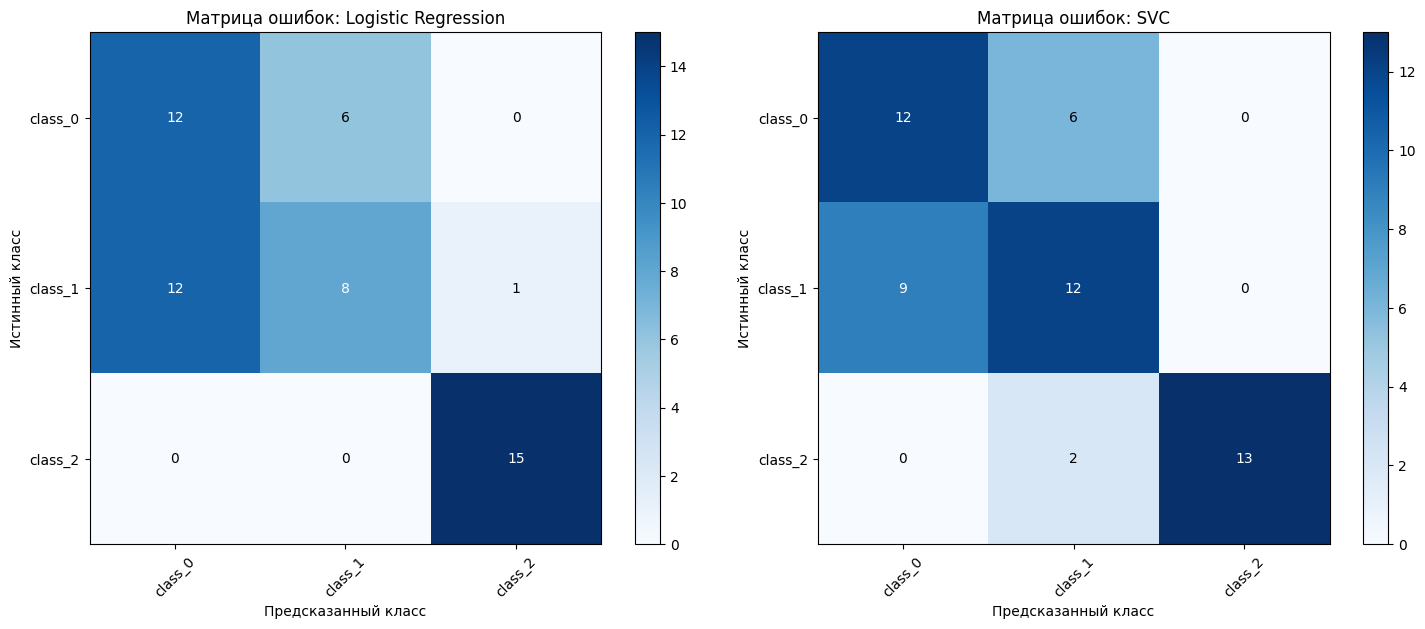

In [12]:
print("\n" + "="*60)
print("5. Classification report")
print("="*60)

print("\nClassification report для логистической регрессии:")
print(classification_report(y_test, y_pred_logreg, target_names=wine.target_names))

print("\nClassification report для SVC:")
print(classification_report(y_test, y_pred_svc, target_names=wine.target_names))

# Дополнительный анализ: вероятности принадлежности к классам
print("\n" + "="*60)
print("Дополнительный анализ: вероятности классов")
print("="*60)

# Получаем вероятности для нескольких примеров
sample_indices = [0, 5, 10]  # Некоторые индексы из тестовой выборки

print("\nПримеры предсказаний вероятностей:")
print("-" * 40)

for model_name, model in [("Logistic Regression", logreg), ("SVC", svc)]:
    print(f"\n{model_name}:")
    if hasattr(model, 'predict_proba'):
        proba = model.predict_proba(X_test[sample_indices])
        for i, idx in enumerate(sample_indices):
            true_class = y_test[idx]
            pred_class = model.predict(X_test[idx:idx+1])[0]
            print(f"  Образец {idx}: истинный класс {true_class} ({wine.target_names[true_class]})")
            print(f"    Предсказанный класс: {pred_class} ({wine.target_names[pred_class]})")
            print(f"    Вероятности: {proba[i].round(3)}")

# Визуализация результатов (опционально)
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("Визуализация результатов")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Матрица ошибок для логистической регрессии
im1 = axes[0].imshow(cm_logreg, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Матрица ошибок: Logistic Regression')
axes[0].set_xlabel('Предсказанный класс')
axes[0].set_ylabel('Истинный класс')
axes[0].set_xticks(range(len(wine.target_names)))
axes[0].set_yticks(range(len(wine.target_names)))
axes[0].set_xticklabels(wine.target_names, rotation=45)
axes[0].set_yticklabels(wine.target_names)
plt.colorbar(im1, ax=axes[0])

# Добавляем текст в ячейки матрицы
for i in range(cm_logreg.shape[0]):
    for j in range(cm_logreg.shape[1]):
        axes[0].text(j, i, str(cm_logreg[i, j]),
                    ha='center', va='center',
                    color='white' if cm_logreg[i, j] > cm_logreg.max()/2 else 'black')

# Матрица ошибок для SVC
im2 = axes[1].imshow(cm_svc, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Матрица ошибок: SVC')
axes[1].set_xlabel('Предсказанный класс')
axes[1].set_ylabel('Истинный класс')
axes[1].set_xticks(range(len(wine.target_names)))
axes[1].set_yticks(range(len(wine.target_names)))
axes[1].set_xticklabels(wine.target_names, rotation=45)
axes[1].set_yticklabels(wine.target_names)
plt.colorbar(im2, ax=axes[1])

# Добавляем текст в ячейки матрицы
for i in range(cm_svc.shape[0]):
    for j in range(cm_svc.shape[1]):
        axes[1].text(j, i, str(cm_svc[i, j]),
                    ha='center', va='center',
                    color='white' if cm_svc[i, j] > cm_svc.max()/2 else 'black')

plt.tight_layout()
plt.show()
